# Taxis in NY city

In [1]:
import pandas as pd

In [2]:
data = pd.read_csv('nyc_taxi_trip_data_sample.csv')

In [3]:
data.shape

(1731797, 14)

In [4]:
data.head()

,medallion,hack_license,vendor_id,rate_code,store_and_fwd_flag,pickup_datetime,dropoff_datetime,passenger_count,trip_time_in_secs,trip_distance,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude
0,037CB433AB5895649F7A9EF37F767EF1,F57FA13A6A82FE2F40D9DB0193DE0FEE,VTS,1,NaN,2013-10-04 20:20:00,2013-10-04 20:42:00,1,1320,4.05,-73.990089,40.723377,-73.941559,40.707790
1,E05E952B2DA14C7E9F1D7DEB80667739,11A3989B7BABB288FA3FA233E348C450,CMT,1,N,2013-09-27 14:16:04,2013-09-27 14:37:17,1,1273,2.10,-73.960022,40.710678,-73.994324,40.722858
2,51B267141807D0261EEB1844D2A78087,9DE60DFD683336F899D5BB448CE7CB09,CMT,1,N,2013-07-18 13:24:37,2013-07-18 13:29:27,3,290,0.90,-73.970634,40.760410,-73.960213,40.770241
3,76AC5C0F44D07BA5A2291F19E730B0B9,2348E03BB8227595281D9D6B38E45B38,VTS,1,NaN,2013-06-25 12:12:00,2013-06-25 12:28:00,2,960,1.28,-73.992661,40.752766,-73.975952,40.751781
4,739323AC15DADABE4B54561CB3330C53,9387A0902D7B1B4597802BE63AE7C34F,VTS,1,NaN,2013-04-19 05:28:00,2013-04-19 05:38:00,1,600,2.22,-73.999107,40.727924,-73.974869,40.741886


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1731797 entries, 0 to 1731796
Data columns (total 14 columns):
 #   Column              Dtype  
---  ------              -----  
 0   medallion           object 
 1   hack_license        object 
 2   vendor_id           object 
 3   rate_code           int64  
 4   store_and_fwd_flag  object 
 5   pickup_datetime     object 
 6   dropoff_datetime    object 
 7   passenger_count     int64  
 8   trip_time_in_secs   int64  
 9   trip_distance       float64
 10  pickup_longitude    float64
 11  pickup_latitude     float64
 12  dropoff_longitude   float64
 13  dropoff_latitude    float64
dtypes: float64(5), int64(3), object(6)
memory usage: 185.0+ MB


In [8]:
import matplotlib.pyplot as plt

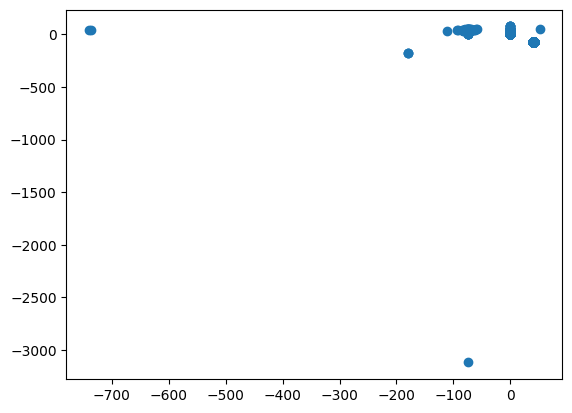

In [9]:
plt.scatter(data.pickup_longitude, data.pickup_latitude)

In [10]:
# Problem: some values are far away 
# for NYC latitude is between 0 and 90, let's check
print(data.pickup_latitude.min(), data.pickup_latitude.max())

-3117.4944 74.00267


In [11]:
# for NYC longitude is between -180 and 0, let's check
print(data.pickup_longitude.min(), data.pickup_longitude.max())

-740.02167 51.977318


In [12]:
data = data[(data.pickup_latitude >= 0) & (data.pickup_latitude <= 90) & 
            (data.pickup_longitude >= -180) & (data.pickup_longitude <= 0)]

In [13]:
data.shape

(1726326, 14)

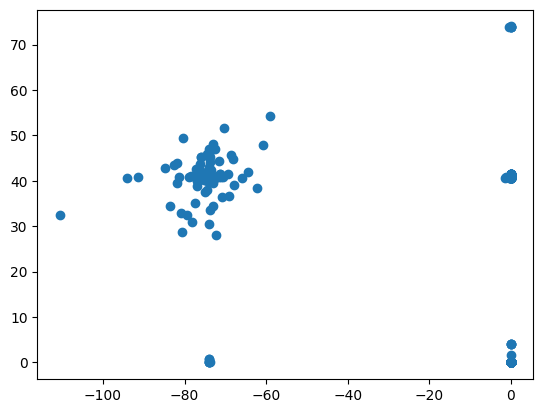

In [14]:
plt.scatter(data.pickup_longitude, data.pickup_latitude)

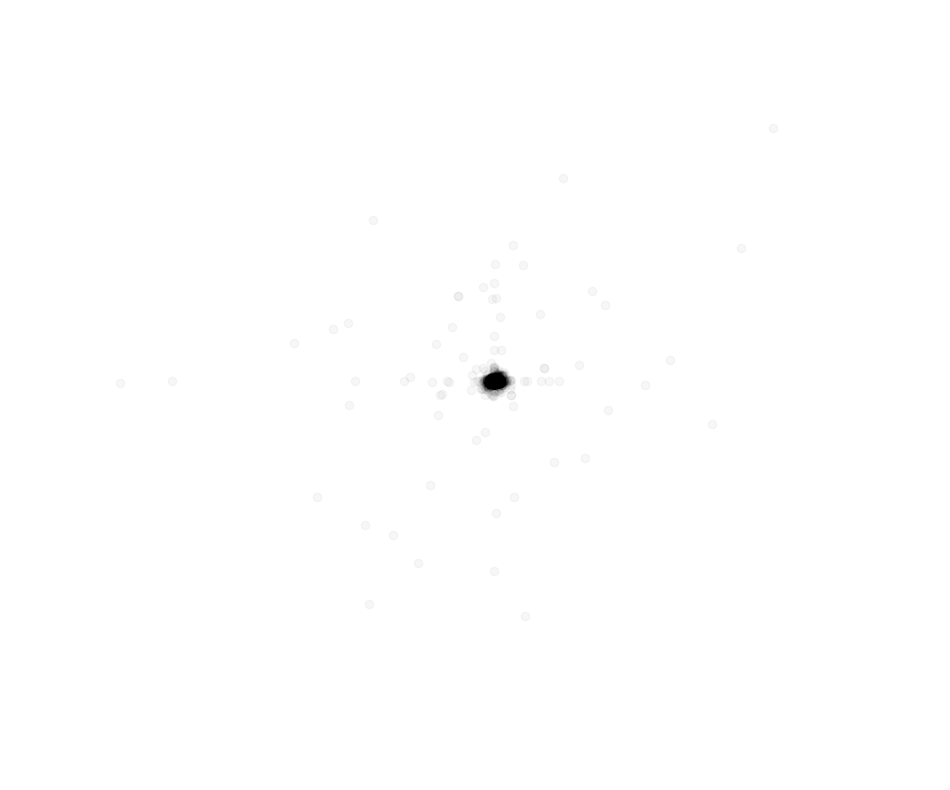

In [24]:
plt.figure(figsize=(12, 10))
plt.axis('equal')
plt.xlim(-100, -50)
plt.ylim(20, 60)
plt.axis('off')
plt.scatter(data.pickup_longitude, data.pickup_latitude, alpha=.03, color='black')

In [25]:
import numpy as np

In [29]:
# Function to convert lon and lat to pixels
def geo_to_pixels(lng, lat):
    lng_rad = lng * np.pi / 180
    lat_rad = lat * np.pi / 180
    x = (256/(2*np.pi))*(lng_rad + np.pi)
    y = (256/(2*np.pi))*(np.log(np.tan(np.pi/4 + lat_rad/2)))
    return (x, y)

In [30]:
px, py = geo_to_pixels(data['pickup_longitude'], data['pickup_latitude'])

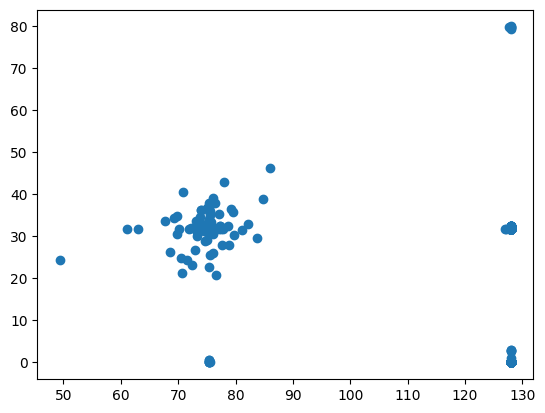

In [31]:
plt.scatter(px, py)

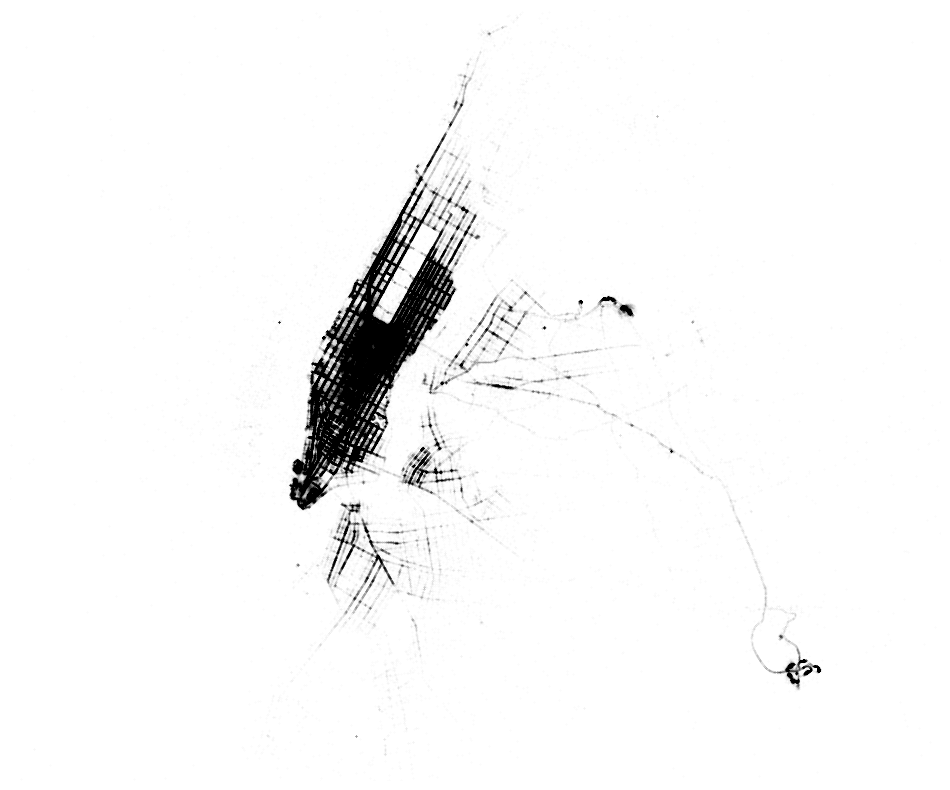

In [37]:
plt.figure(figsize=(12, 10))
plt.axis('equal')
plt.xlim(75.3, 75.55)
plt.ylim(31.65, 31.90)
plt.axis('off')
plt.gca().set_facecolor('white')
plt.scatter(px, py, s=.1, alpha=.03, color='black')